# US Energy data

First, you need to [register for an API key at the EIA](https://www.eia.gov/opendata/register.php). This requires an email address.

One option is to put it in a file called `secrets.py` and keep it to yourself. So, for instance, if you use GitHub, say, make sure you add that file to your `.gitignore` file. So the file might contain:

    eia = "c742288cf5e46cff832ace44a7d54a4fa"
    
Then, from this notebook, you can do:

    from secrets import eia as key
    
Alternatively, just copy and paste your key here:

In [1]:
key = "  <KEY GOES HERE>  "

You'll also need the requests library. If you don't have it, you can run this cell:

In [2]:
import requests

To figure out the name of the series you need, drill down here: https://www.eia.gov/opendata/qb.php

For example, if we go to EIA Data Sets > Petroleum > Prices > NYMEX Futures Prices, we get this info:

- API call to use: http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=PET.RCLC1.M
- Series name: _Cushing, OK Crude Oil Future Contract 1, Monthly_

Now we have everything we need to make our own API call to this dataset:

In [3]:
url = "http://api.eia.gov/series/"

params = {
    "api_key": key,
    "series_id": "PET.RCLC1.M",
}

r = requests.get(url, params=params)

In [4]:
r.status_code

200

In [5]:
r.json()

{'request': {'command': 'series', 'series_id': 'PET.RCLC1.M'},
 'series': [{'series_id': 'PET.RCLC1.M',
   'name': 'Cushing, OK Crude Oil Future Contract 1, Monthly',
   'units': 'Dollars per Barrel',
   'f': 'M',
   'unitsshort': '$/bbl',
   'description': 'Cushing, OK Crude Oil Future Contract 1',
   'copyright': 'None',
   'source': 'EIA, U.S. Energy Information Administration',
   'iso3166': 'USA-OK',
   'geography': 'USA-OK',
   'start': '198304',
   'end': '201902',
   'updated': '2019-03-13T13:18:16-0400',
   'data': [['201902', 55.01],
    ['201901', 51.38],
    ['201812', 48.68],
    ['201811', 56.6],
    ['201810', 70.76],
    ['201809', 70.07],
    ['201808', 67.85],
    ['201807', 70.74],
    ['201806', 67.32],
    ['201805', 69.89],
    ['201804', 66.33],
    ['201803', 62.87],
    ['201802', 62.16],
    ['201801', 63.55],
    ['201712', 57.95],
    ['201711', 56.54],
    ['201710', 51.69],
    ['201709', 49.88],
    ['201708', 48.06],
    ['201707', 46.68],
    ['201706',

In [44]:
import pandas as pd

df = pd.DataFrame(r.json()['series'][0]['data'], columns=['Date', 'Price'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
df = df.set_index('Date').sort_index()

In [45]:
df.head()

,Price
Date,
1983-04-01,30.50
1983-05-01,30.16
1983-06-01,30.96
1983-07-01,31.59
1983-08-01,31.88


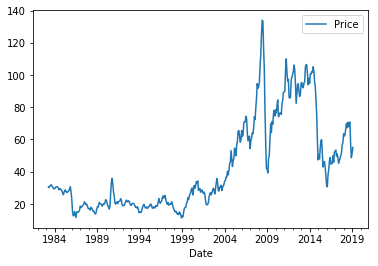

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot()

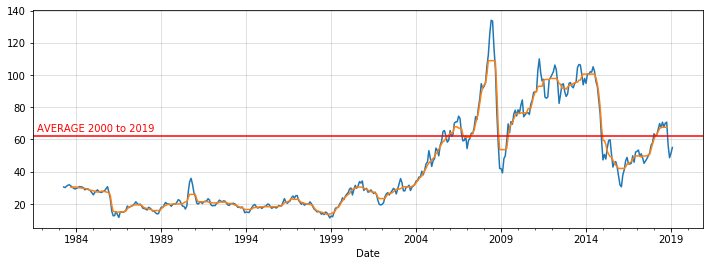

In [60]:
plt.figure(figsize=(12,4))
df.Price.plot()
df.Price.rolling(10, center=True).median().plot()
plt.axhline(df.Price.loc['Jan 2000':'Jan 2019'].mean(), color='r')
plt.text(140, 65, "AVERAGE 2000 to 2019", color='r')
plt.grid(color='k', alpha=0.15)